# Introduction to the neural networks
sources: https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc

## definition


**neuron** = linear + activation

**model** = architecture + parameters


Dr. Robert Hecht-Nielsen defines a neural network as:


"...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."

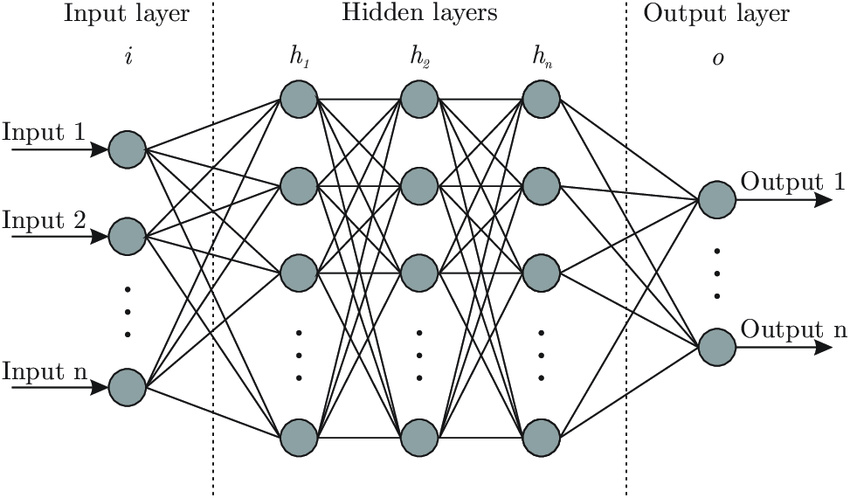

In [21]:
from IPython.display import Image
Image(filename="img/neural_network.jpeg", width=600)

## architecture

- **Input nodes** (input layer) - pass the information to the next layer 


- **Hidden nodes** (hidden layer) -  they perform computations and then transfer the weights (signals or information) from the input layer to the following layer


- **Output nodes** (output layer) - use an activation function that maps to the desired output format


- **Connections and weights** - each connection transferring the output of a neuron i to the input of a neuron j


- **Activation function** - defines the output of that node given an input or set of inputs


- **Learning rule** - a rule or an algorithm which modifies the parameters of the neural network

## types of neural networks (a few chosen)

1. **Feedforward Neural Network** - the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes; there are no cycles or loops in the network

    examples:

    a) **Single-layer Perceptron** - does not contain any hidden layer

    b) **Multi-layer Perceptron (MLP)** - consists of multiple layers of computational units

    c) **Convolutional Neural Network (CNN)** - specializes in processing data that has a grid-like topology, such as an image; the layers are arranged in such a way so that they detect simpler patterns first (lines, curves, etc.) and more complex patterns (faces, objects, etc.) further along


2. **Recurrent neural networks** - connections between units form a directed cycle (they propagate data forward, but also backwards, from later processing stages to earlier stages)

## common activation functions
- Sigmoid 
- Tanh
- ReLu
- Leaky ReLu

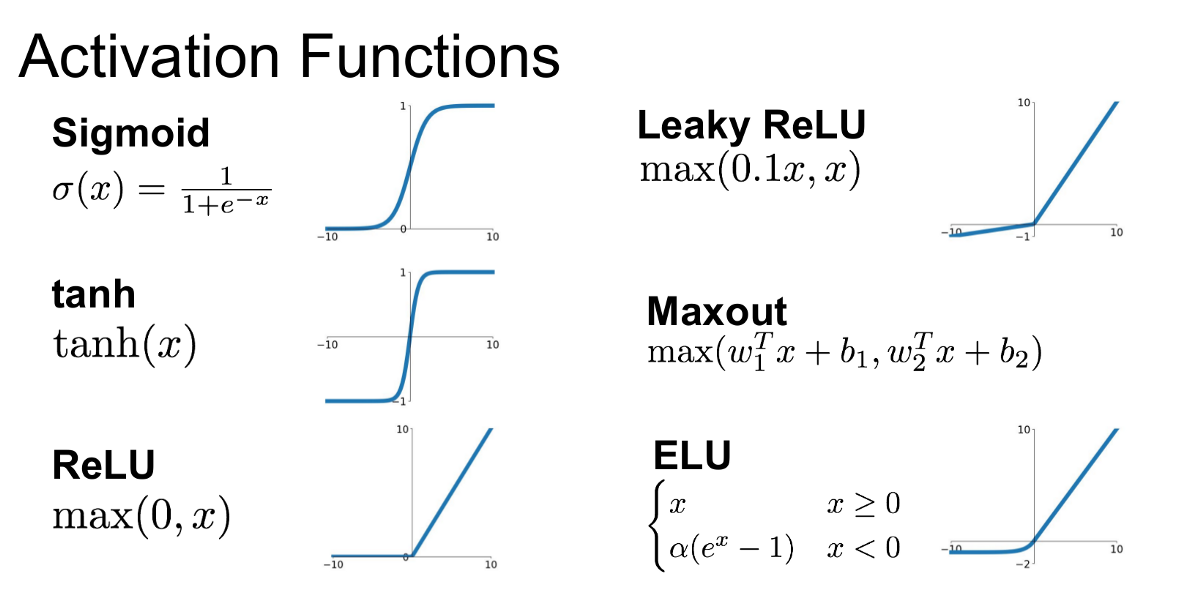

In [9]:
Image(filename="img/activation_functions.png", width=700)

# Single-layer Perceptron in Python
sources: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

- The Perceptron is a classification algorithm for problems with two classes (0 and 1) where a linear equation (like or hyperplane) can be used to separate the two classes.


- The weights of the Perceptron algorithm must be estimated from the training data using stochastic gradient descent (evaluates and updates the weights every iteration )

### weights are updated in the following way
w = w + learning_rate * (expected - predicted) * x

## prepares data

In [37]:
train_dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1]]

test_dataset = [[3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [7.673756466,3.508563011,1],
    [5.332441248,2.088626775,1]]

## defines prediction

In [25]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

## defines weights updates with stochastic gradient descent

In [26]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

## trains weights

In [40]:
l_rate = 0.1
n_epoch = 5
weights = train_weights(train_dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


## uses trained weights to predict new data

In [41]:
for row in test_dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
